In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.ioff()

## Memory Management

In [2]:
import warnings
warnings.simplefilter(action="always", category=RuntimeWarning)

In [3]:
for i in range(21):
    plt.figure()
    plt.hist(np.random.randn(1000))

/Users/croach/anaconda/envs/mpl/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [4]:
plt.get_fignums()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

### Why does this happen?

By default, the `pylot` plotting functions do not close figures as they're used. Instead, `pyplot` registers an event listener that destroys all figures in memory when your script comes to an end. While the script is running, however, the `pyplot` interface does actively manage memory by reusing a single figure over and over again. Basically, every time a figure is rendered (output to a file or displayed in a window) `pyplot` will clear the figure and reuse it for the next set of plotting commands. It grabs the current figure from the top of global stack, and it always checks the stack for a figure before it creates a new one. If the user calls the `figure` function directly, they bypass this check and create a new figure and add it to the top of the stack, and `pyplot` just uses that whenever plotting commands are called. This means that each time the figure 

In [5]:
plt.close("all")

In [8]:
for i in range(21):
    plt.figure()
    plt.hist(np.random.randn(1000))
    plt.close()

Now we no longer get a warning because we are closing each figure manually after we're finished with it.

In [7]:
plt.get_fignums()

[]

However, for the interactive backends (e.g., UI and Jupyter notebook), the `_pylab_helpers.destroy` function is called once the figure is shown. So, we end up with only 1 active figure in the queue at all times. So, every at every iteration, we call the `figure` function to create a new figure, show it, then close it and start all over. So, every iteration has a brand new figure.

NOTE TO SELF: not sure if I want to use the logger function again on this example. My main reasoning behind it was to show that the close function gets called and it's useful to see the figure being created again every time through the loop, but not sure if it adds value, or if it's just a bit too cluttered.

In [15]:
# Current indentation level (i.e., how deep in the call stack we are)
level = 0
# Global variable to keep track of the current line number
line = 0

# Wraps a function in a function that prints our call information
def logger(fn):
    def wrapper(*args, **kwargs):
        # Create the padding string according to the current level in the call
        # stack, and increase the level since we're about to pop another 
        # function onto the stack.
        global level, line
        padding = "|" + "-" * (level * 4 - 1) if level > 0 else ""
        level += 1

        # Print calling information, call the function, and print returning info
        line += 1
        print "%2d. %sCalling %s.%s" % (line, padding, fn.__module__, fn.__name__)
        result = fn(*args, **kwargs)
        line += 1
        print "%2d. %sReturning <%s:%s> from %s.%s" % \
            (line, padding, result.__class__.__name__, id(result), fn.__module__, fn.__name__)
        
        # Decrease the call stack level, since we are returning.
        level -= 1
        return result
    return wrapper
    
# Decorate several methods with the logger function
plt.gca = logger(plt.gca)
plt.gcf = logger(plt.gcf)
plt.figure = logger(plt.figure)
plt.close = logger(plt.close)
from matplotlib.figure import Figure
Figure.gca = logger(Figure.gca)
Figure.add_subplot = logger(Figure.add_subplot)

In [16]:
plt.close("all")

 1. Calling matplotlib.pyplot.close
 2. Returning <NoneType:4296531008> from matplotlib.pyplot.close


 1. Calling matplotlib.pyplot.figure
 2. Returning <Figure:4428436880> from matplotlib.pyplot.figure
 3. Calling matplotlib.pyplot.gca
 4. |---Calling matplotlib.pyplot.gcf
 5. |---Returning <Figure:4428436880> from matplotlib.pyplot.gcf
 6. |---Calling matplotlib.figure.gca
 7. |-------Calling matplotlib.figure.add_subplot
 8. |-------Returning <AxesSubplot:4427814224> from matplotlib.figure.add_subplot
 9. |---Returning <AxesSubplot:4427814224> from matplotlib.figure.gca
10. Returning <AxesSubplot:4427814224> from matplotlib.pyplot.gca


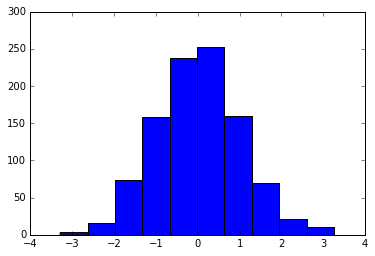

11. Calling matplotlib.pyplot.close
12. Returning <NoneType:4296531008> from matplotlib.pyplot.close
-------------------------------------------------------------------------------
 1. Calling matplotlib.pyplot.figure
 2. Returning <Figure:4390434768> from matplotlib.pyplot.figure
 3. Calling matplotlib.pyplot.gca
 4. |---Calling matplotlib.pyplot.gcf
 5. |---Returning <Figure:4390434768> from matplotlib.pyplot.gcf
 6. |---Calling matplotlib.figure.gca
 7. |-------Calling matplotlib.figure.add_subplot
 8. |-------Returning <AxesSubplot:4407086224> from matplotlib.figure.add_subplot
 9. |---Returning <AxesSubplot:4407086224> from matplotlib.figure.gca
10. Returning <AxesSubplot:4407086224> from matplotlib.pyplot.gca


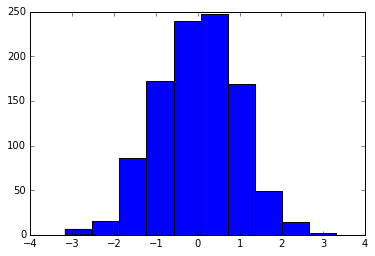

11. Calling matplotlib.pyplot.close
12. Returning <NoneType:4296531008> from matplotlib.pyplot.close
-------------------------------------------------------------------------------
 1. Calling matplotlib.pyplot.figure
 2. Returning <Figure:4391108944> from matplotlib.pyplot.figure
 3. Calling matplotlib.pyplot.gca
 4. |---Calling matplotlib.pyplot.gcf
 5. |---Returning <Figure:4391108944> from matplotlib.pyplot.gcf
 6. |---Calling matplotlib.figure.gca
 7. |-------Calling matplotlib.figure.add_subplot
 8. |-------Returning <AxesSubplot:4408237392> from matplotlib.figure.add_subplot
 9. |---Returning <AxesSubplot:4408237392> from matplotlib.figure.gca
10. Returning <AxesSubplot:4408237392> from matplotlib.pyplot.gca


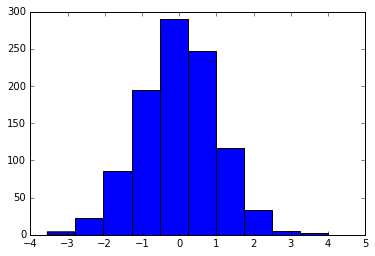

11. Calling matplotlib.pyplot.close
12. Returning <NoneType:4296531008> from matplotlib.pyplot.close
-------------------------------------------------------------------------------
 1. Calling matplotlib.pyplot.figure
 2. Returning <Figure:4390423568> from matplotlib.pyplot.figure
 3. Calling matplotlib.pyplot.gca
 4. |---Calling matplotlib.pyplot.gcf
 5. |---Returning <Figure:4390423568> from matplotlib.pyplot.gcf
 6. |---Calling matplotlib.figure.gca
 7. |-------Calling matplotlib.figure.add_subplot
 8. |-------Returning <AxesSubplot:4390397648> from matplotlib.figure.add_subplot
 9. |---Returning <AxesSubplot:4390397648> from matplotlib.figure.gca
10. Returning <AxesSubplot:4390397648> from matplotlib.pyplot.gca


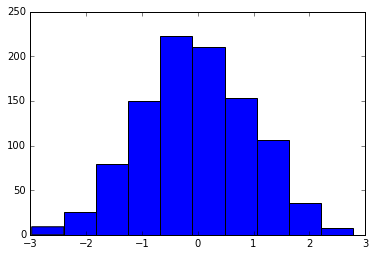

11. Calling matplotlib.pyplot.close
12. Returning <NoneType:4296531008> from matplotlib.pyplot.close
-------------------------------------------------------------------------------
 1. Calling matplotlib.pyplot.figure
 2. Returning <Figure:4409797008> from matplotlib.pyplot.figure
 3. Calling matplotlib.pyplot.gca
 4. |---Calling matplotlib.pyplot.gcf
 5. |---Returning <Figure:4409797008> from matplotlib.pyplot.gcf
 6. |---Calling matplotlib.figure.gca
 7. |-------Calling matplotlib.figure.add_subplot
 8. |-------Returning <AxesSubplot:4409636624> from matplotlib.figure.add_subplot
 9. |---Returning <AxesSubplot:4409636624> from matplotlib.figure.gca
10. Returning <AxesSubplot:4409636624> from matplotlib.pyplot.gca


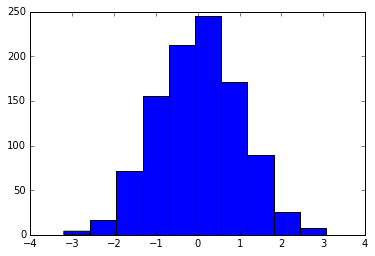

11. Calling matplotlib.pyplot.close
12. Returning <NoneType:4296531008> from matplotlib.pyplot.close
-------------------------------------------------------------------------------
 1. Calling matplotlib.pyplot.figure
 2. Returning <Figure:4409503824> from matplotlib.pyplot.figure
 3. Calling matplotlib.pyplot.gca
 4. |---Calling matplotlib.pyplot.gcf
 5. |---Returning <Figure:4409503824> from matplotlib.pyplot.gcf
 6. |---Calling matplotlib.figure.gca
 7. |-------Calling matplotlib.figure.add_subplot
 8. |-------Returning <AxesSubplot:4410103184> from matplotlib.figure.add_subplot
 9. |---Returning <AxesSubplot:4410103184> from matplotlib.figure.gca
10. Returning <AxesSubplot:4410103184> from matplotlib.pyplot.gca


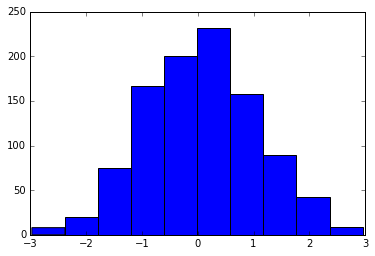

11. Calling matplotlib.pyplot.close
12. Returning <NoneType:4296531008> from matplotlib.pyplot.close
-------------------------------------------------------------------------------
 1. Calling matplotlib.pyplot.figure
 2. Returning <Figure:4387758160> from matplotlib.pyplot.figure
 3. Calling matplotlib.pyplot.gca
 4. |---Calling matplotlib.pyplot.gcf
 5. |---Returning <Figure:4387758160> from matplotlib.pyplot.gcf
 6. |---Calling matplotlib.figure.gca
 7. |-------Calling matplotlib.figure.add_subplot
 8. |-------Returning <AxesSubplot:4387654608> from matplotlib.figure.add_subplot
 9. |---Returning <AxesSubplot:4387654608> from matplotlib.figure.gca
10. Returning <AxesSubplot:4387654608> from matplotlib.pyplot.gca


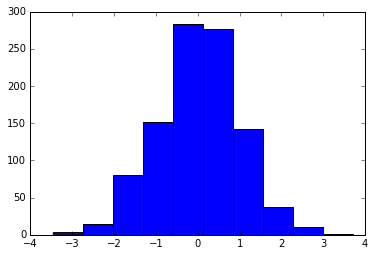

11. Calling matplotlib.pyplot.close
12. Returning <NoneType:4296531008> from matplotlib.pyplot.close
-------------------------------------------------------------------------------
 1. Calling matplotlib.pyplot.figure
 2. Returning <Figure:4394188432> from matplotlib.pyplot.figure
 3. Calling matplotlib.pyplot.gca
 4. |---Calling matplotlib.pyplot.gcf
 5. |---Returning <Figure:4394188432> from matplotlib.pyplot.gcf
 6. |---Calling matplotlib.figure.gca
 7. |-------Calling matplotlib.figure.add_subplot
 8. |-------Returning <AxesSubplot:4394071632> from matplotlib.figure.add_subplot
 9. |---Returning <AxesSubplot:4394071632> from matplotlib.figure.gca
10. Returning <AxesSubplot:4394071632> from matplotlib.pyplot.gca


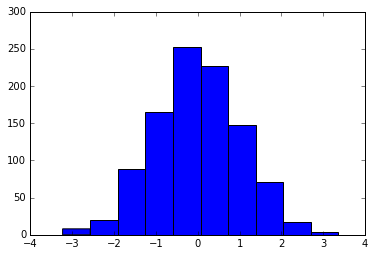

11. Calling matplotlib.pyplot.close
12. Returning <NoneType:4296531008> from matplotlib.pyplot.close
-------------------------------------------------------------------------------
 1. Calling matplotlib.pyplot.figure
 2. Returning <Figure:4424086224> from matplotlib.pyplot.figure
 3. Calling matplotlib.pyplot.gca
 4. |---Calling matplotlib.pyplot.gcf
 5. |---Returning <Figure:4424086224> from matplotlib.pyplot.gcf
 6. |---Calling matplotlib.figure.gca
 7. |-------Calling matplotlib.figure.add_subplot
 8. |-------Returning <AxesSubplot:4387493456> from matplotlib.figure.add_subplot
 9. |---Returning <AxesSubplot:4387493456> from matplotlib.figure.gca
10. Returning <AxesSubplot:4387493456> from matplotlib.pyplot.gca


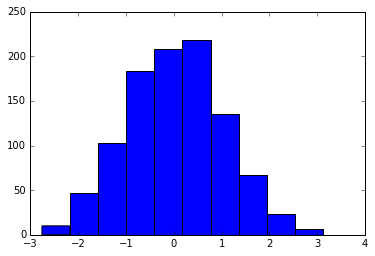

11. Calling matplotlib.pyplot.close
12. Returning <NoneType:4296531008> from matplotlib.pyplot.close
-------------------------------------------------------------------------------
 1. Calling matplotlib.pyplot.figure
 2. Returning <Figure:4405165456> from matplotlib.pyplot.figure
 3. Calling matplotlib.pyplot.gca
 4. |---Calling matplotlib.pyplot.gcf
 5. |---Returning <Figure:4405165456> from matplotlib.pyplot.gcf
 6. |---Calling matplotlib.figure.gca
 7. |-------Calling matplotlib.figure.add_subplot
 8. |-------Returning <AxesSubplot:4405213648> from matplotlib.figure.add_subplot
 9. |---Returning <AxesSubplot:4405213648> from matplotlib.figure.gca
10. Returning <AxesSubplot:4405213648> from matplotlib.pyplot.gca


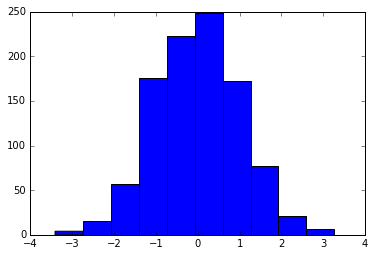

11. Calling matplotlib.pyplot.close
12. Returning <NoneType:4296531008> from matplotlib.pyplot.close
-------------------------------------------------------------------------------
 1. Calling matplotlib.pyplot.figure
 2. Returning <Figure:4390208208> from matplotlib.pyplot.figure
 3. Calling matplotlib.pyplot.gca
 4. |---Calling matplotlib.pyplot.gcf
 5. |---Returning <Figure:4390208208> from matplotlib.pyplot.gcf
 6. |---Calling matplotlib.figure.gca
 7. |-------Calling matplotlib.figure.add_subplot
 8. |-------Returning <AxesSubplot:4426939920> from matplotlib.figure.add_subplot
 9. |---Returning <AxesSubplot:4426939920> from matplotlib.figure.gca
10. Returning <AxesSubplot:4426939920> from matplotlib.pyplot.gca


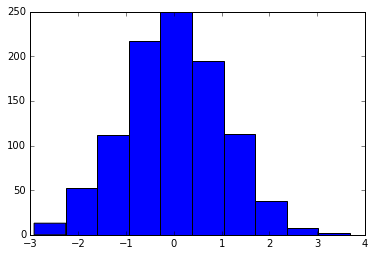

11. Calling matplotlib.pyplot.close
12. Returning <NoneType:4296531008> from matplotlib.pyplot.close
-------------------------------------------------------------------------------
 1. Calling matplotlib.pyplot.figure
 2. Returning <Figure:4422567952> from matplotlib.pyplot.figure
 3. Calling matplotlib.pyplot.gca
 4. |---Calling matplotlib.pyplot.gcf
 5. |---Returning <Figure:4422567952> from matplotlib.pyplot.gcf
 6. |---Calling matplotlib.figure.gca
 7. |-------Calling matplotlib.figure.add_subplot
 8. |-------Returning <AxesSubplot:4405165008> from matplotlib.figure.add_subplot
 9. |---Returning <AxesSubplot:4405165008> from matplotlib.figure.gca
10. Returning <AxesSubplot:4405165008> from matplotlib.pyplot.gca


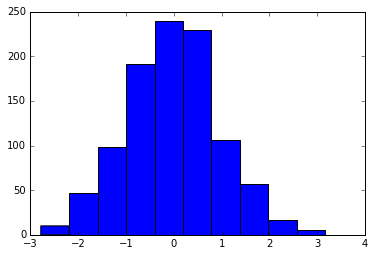

11. Calling matplotlib.pyplot.close
12. Returning <NoneType:4296531008> from matplotlib.pyplot.close
-------------------------------------------------------------------------------
 1. Calling matplotlib.pyplot.figure
 2. Returning <Figure:4408338960> from matplotlib.pyplot.figure
 3. Calling matplotlib.pyplot.gca
 4. |---Calling matplotlib.pyplot.gcf
 5. |---Returning <Figure:4408338960> from matplotlib.pyplot.gcf
 6. |---Calling matplotlib.figure.gca
 7. |-------Calling matplotlib.figure.add_subplot
 8. |-------Returning <AxesSubplot:4408879504> from matplotlib.figure.add_subplot
 9. |---Returning <AxesSubplot:4408879504> from matplotlib.figure.gca
10. Returning <AxesSubplot:4408879504> from matplotlib.pyplot.gca


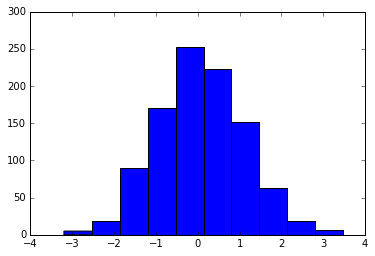

11. Calling matplotlib.pyplot.close
12. Returning <NoneType:4296531008> from matplotlib.pyplot.close
-------------------------------------------------------------------------------
 1. Calling matplotlib.pyplot.figure
 2. Returning <Figure:4390256080> from matplotlib.pyplot.figure
 3. Calling matplotlib.pyplot.gca
 4. |---Calling matplotlib.pyplot.gcf
 5. |---Returning <Figure:4390256080> from matplotlib.pyplot.gcf
 6. |---Calling matplotlib.figure.gca
 7. |-------Calling matplotlib.figure.add_subplot
 8. |-------Returning <AxesSubplot:4402700944> from matplotlib.figure.add_subplot
 9. |---Returning <AxesSubplot:4402700944> from matplotlib.figure.gca
10. Returning <AxesSubplot:4402700944> from matplotlib.pyplot.gca


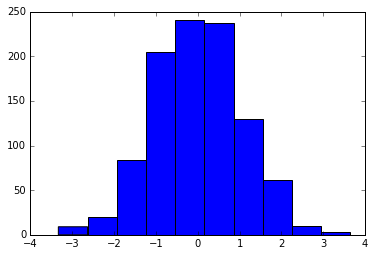

11. Calling matplotlib.pyplot.close
12. Returning <NoneType:4296531008> from matplotlib.pyplot.close
-------------------------------------------------------------------------------
 1. Calling matplotlib.pyplot.figure
 2. Returning <Figure:4422667216> from matplotlib.pyplot.figure
 3. Calling matplotlib.pyplot.gca
 4. |---Calling matplotlib.pyplot.gcf
 5. |---Returning <Figure:4422667216> from matplotlib.pyplot.gcf
 6. |---Calling matplotlib.figure.gca
 7. |-------Calling matplotlib.figure.add_subplot
 8. |-------Returning <AxesSubplot:4410510096> from matplotlib.figure.add_subplot
 9. |---Returning <AxesSubplot:4410510096> from matplotlib.figure.gca
10. Returning <AxesSubplot:4410510096> from matplotlib.pyplot.gca


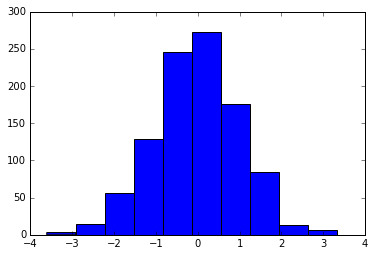

11. Calling matplotlib.pyplot.close
12. Returning <NoneType:4296531008> from matplotlib.pyplot.close
-------------------------------------------------------------------------------
 1. Calling matplotlib.pyplot.figure
 2. Returning <Figure:4409316944> from matplotlib.pyplot.figure
 3. Calling matplotlib.pyplot.gca
 4. |---Calling matplotlib.pyplot.gcf
 5. |---Returning <Figure:4409316944> from matplotlib.pyplot.gcf
 6. |---Calling matplotlib.figure.gca
 7. |-------Calling matplotlib.figure.add_subplot
 8. |-------Returning <AxesSubplot:4394108816> from matplotlib.figure.add_subplot
 9. |---Returning <AxesSubplot:4394108816> from matplotlib.figure.gca
10. Returning <AxesSubplot:4394108816> from matplotlib.pyplot.gca


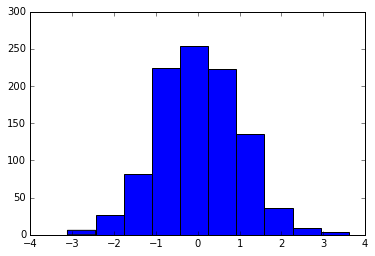

11. Calling matplotlib.pyplot.close
12. Returning <NoneType:4296531008> from matplotlib.pyplot.close
-------------------------------------------------------------------------------
 1. Calling matplotlib.pyplot.figure
 2. Returning <Figure:4412013456> from matplotlib.pyplot.figure
 3. Calling matplotlib.pyplot.gca
 4. |---Calling matplotlib.pyplot.gcf
 5. |---Returning <Figure:4412013456> from matplotlib.pyplot.gcf
 6. |---Calling matplotlib.figure.gca
 7. |-------Calling matplotlib.figure.add_subplot
 8. |-------Returning <AxesSubplot:4412158736> from matplotlib.figure.add_subplot
 9. |---Returning <AxesSubplot:4412158736> from matplotlib.figure.gca
10. Returning <AxesSubplot:4412158736> from matplotlib.pyplot.gca


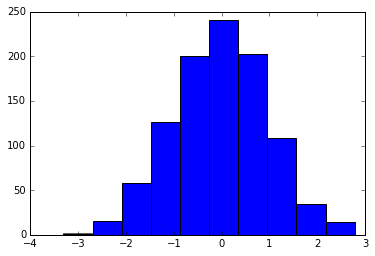

11. Calling matplotlib.pyplot.close
12. Returning <NoneType:4296531008> from matplotlib.pyplot.close
-------------------------------------------------------------------------------
 1. Calling matplotlib.pyplot.figure
 2. Returning <Figure:4409753104> from matplotlib.pyplot.figure
 3. Calling matplotlib.pyplot.gca
 4. |---Calling matplotlib.pyplot.gcf
 5. |---Returning <Figure:4409753104> from matplotlib.pyplot.gcf
 6. |---Calling matplotlib.figure.gca
 7. |-------Calling matplotlib.figure.add_subplot
 8. |-------Returning <AxesSubplot:4409535056> from matplotlib.figure.add_subplot
 9. |---Returning <AxesSubplot:4409535056> from matplotlib.figure.gca
10. Returning <AxesSubplot:4409535056> from matplotlib.pyplot.gca


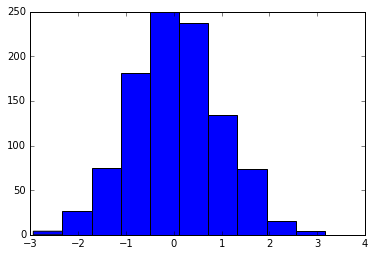

11. Calling matplotlib.pyplot.close
12. Returning <NoneType:4296531008> from matplotlib.pyplot.close
-------------------------------------------------------------------------------
 1. Calling matplotlib.pyplot.figure
 2. Returning <Figure:4390472528> from matplotlib.pyplot.figure
 3. Calling matplotlib.pyplot.gca
 4. |---Calling matplotlib.pyplot.gcf
 5. |---Returning <Figure:4390472528> from matplotlib.pyplot.gcf
 6. |---Calling matplotlib.figure.gca
 7. |-------Calling matplotlib.figure.add_subplot
 8. |-------Returning <AxesSubplot:4390430992> from matplotlib.figure.add_subplot
 9. |---Returning <AxesSubplot:4390430992> from matplotlib.figure.gca
10. Returning <AxesSubplot:4390430992> from matplotlib.pyplot.gca


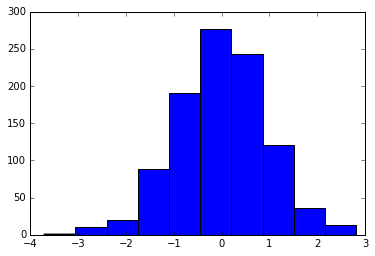

11. Calling matplotlib.pyplot.close
12. Returning <NoneType:4296531008> from matplotlib.pyplot.close
-------------------------------------------------------------------------------
 1. Calling matplotlib.pyplot.figure
 2. Returning <Figure:4409623952> from matplotlib.pyplot.figure
 3. Calling matplotlib.pyplot.gca
 4. |---Calling matplotlib.pyplot.gcf
 5. |---Returning <Figure:4409623952> from matplotlib.pyplot.gcf
 6. |---Calling matplotlib.figure.gca
 7. |-------Calling matplotlib.figure.add_subplot
 8. |-------Returning <AxesSubplot:4422487312> from matplotlib.figure.add_subplot
 9. |---Returning <AxesSubplot:4422487312> from matplotlib.figure.gca
10. Returning <AxesSubplot:4422487312> from matplotlib.pyplot.gca


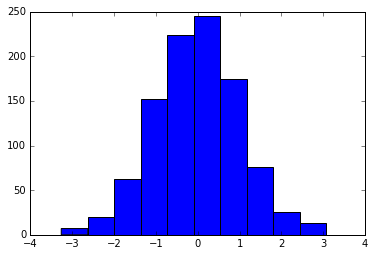

11. Calling matplotlib.pyplot.close
12. Returning <NoneType:4296531008> from matplotlib.pyplot.close
-------------------------------------------------------------------------------
 1. Calling matplotlib.pyplot.figure
 2. Returning <Figure:4402488720> from matplotlib.pyplot.figure
 3. Calling matplotlib.pyplot.gca
 4. |---Calling matplotlib.pyplot.gcf
 5. |---Returning <Figure:4402488720> from matplotlib.pyplot.gcf
 6. |---Calling matplotlib.figure.gca
 7. |-------Calling matplotlib.figure.add_subplot
 8. |-------Returning <AxesSubplot:4427746128> from matplotlib.figure.add_subplot
 9. |---Returning <AxesSubplot:4427746128> from matplotlib.figure.gca
10. Returning <AxesSubplot:4427746128> from matplotlib.pyplot.gca


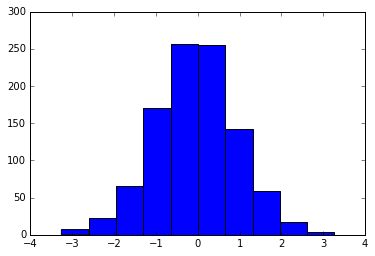

11. Calling matplotlib.pyplot.close
12. Returning <NoneType:4296531008> from matplotlib.pyplot.close
-------------------------------------------------------------------------------


In [20]:
for i in range(21):
    plt.figure()
    plt.hist(np.random.randn(1000))
    plt.show()
    print '-'*79
    line = 0

In [14]:
plt.get_fignums()

[]